# PCA and Machine Learning 
### Helia Moghaddasi 


In [3]:
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

plt.style.use("ggplot")
plt.rcParams["figure.figsize"] = (12,8)

 # data URL: https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data
iris = pd.read_csv("https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data",
                  header=None)

iris.head()


,0,1,2,3,4
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


## Upload data

#### The Iris Dataset  used for Principle Component Analysis (PCA) and classification models is obtained from Kaggle.

In [4]:
iris.columns = ["sepal_length", "sepal_width", "petal_length","petal_width", "species"] 
iris.dropna(how='all', inplace = True)
iris.head()


,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [5]:
iris.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


## Scatterplot 

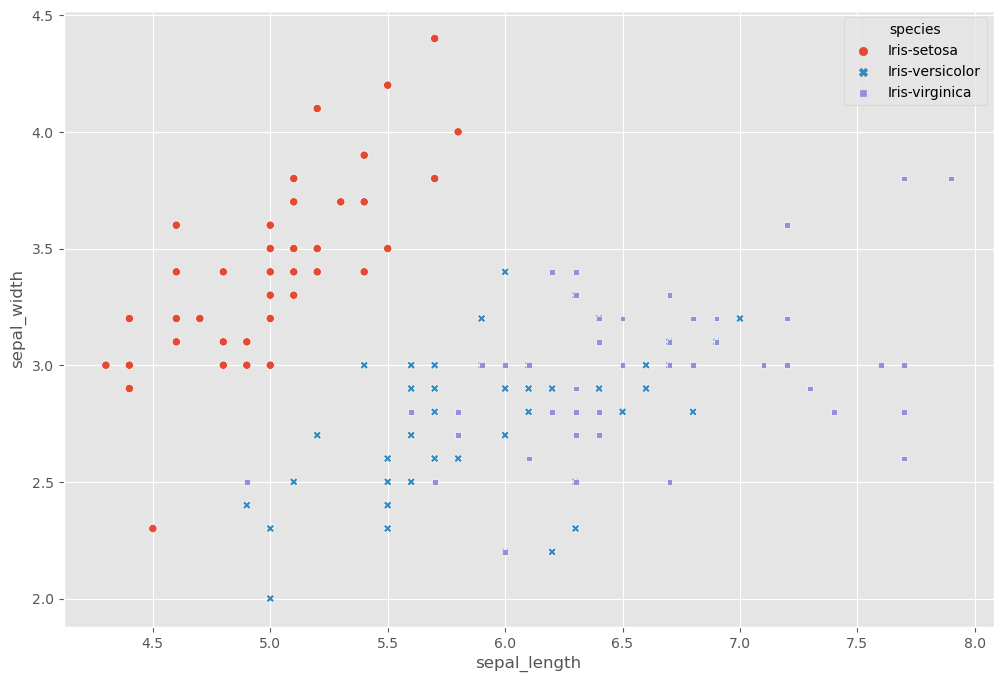

In [6]:
sns.scatterplot(x = iris.sepal_length, y = iris.sepal_width, 
                hue = iris.species,
                style = iris.species);

## Covariance

In [7]:
X = iris.iloc[:, 0:4].values
y = iris.species.values

from sklearn.preprocessing import StandardScaler

X = StandardScaler().fit_transform(X)


In [9]:
covariance_matrix = np.cov(X.T)
print("covariance matrix: \n", covariance_matrix)


covariance matrix: 
 [[ 1.00671141 -0.11010327  0.87760486  0.82344326]
 [-0.11010327  1.00671141 -0.42333835 -0.358937  ]
 [ 0.87760486 -0.42333835  1.00671141  0.96921855]
 [ 0.82344326 -0.358937    0.96921855  1.00671141]]


## Eigen Decomposition

In [10]:
eigen_values, eigen_vectors = np.linalg.eig(covariance_matrix)
print("eigenvalues: :\n", eigen_values, "\n eigenvectors: \n", eigen_vectors)


eigenvalues: :
 [2.93035378 0.92740362 0.14834223 0.02074601] 
 eigenvectors: 
 [[ 0.52237162 -0.37231836 -0.72101681  0.26199559]
 [-0.26335492 -0.92555649  0.24203288 -0.12413481]
 [ 0.58125401 -0.02109478  0.14089226 -0.80115427]
 [ 0.56561105 -0.06541577  0.6338014   0.52354627]]


In [11]:
eigen_vec_svd, s, v = np.linalg.svd(X.T)
eigen_vec_svd


array([[-0.52237162, -0.37231836,  0.72101681,  0.26199559],
       [ 0.26335492, -0.92555649, -0.24203288, -0.12413481],
       [-0.58125401, -0.02109478, -0.14089226, -0.80115427],
       [-0.56561105, -0.06541577, -0.6338014 ,  0.52354627]])

In [12]:
for val in eigen_values :
    print(val)


2.930353775589313
0.9274036215173417
0.1483422264816399
0.020746013995595784


In [13]:
variance_explained = [(i/sum(eigen_values))*100 for i in eigen_values]
variance_explained


[72.77045209380131, 23.030523267680664, 3.6838319576273926, 0.515192680890629]

In [14]:
cumulative_variance_explaiend = np.cumsum(variance_explained)
cumulative_variance_explaiend


array([ 72.77045209,  95.80097536,  99.48480732, 100.        ])

## Screen Plot

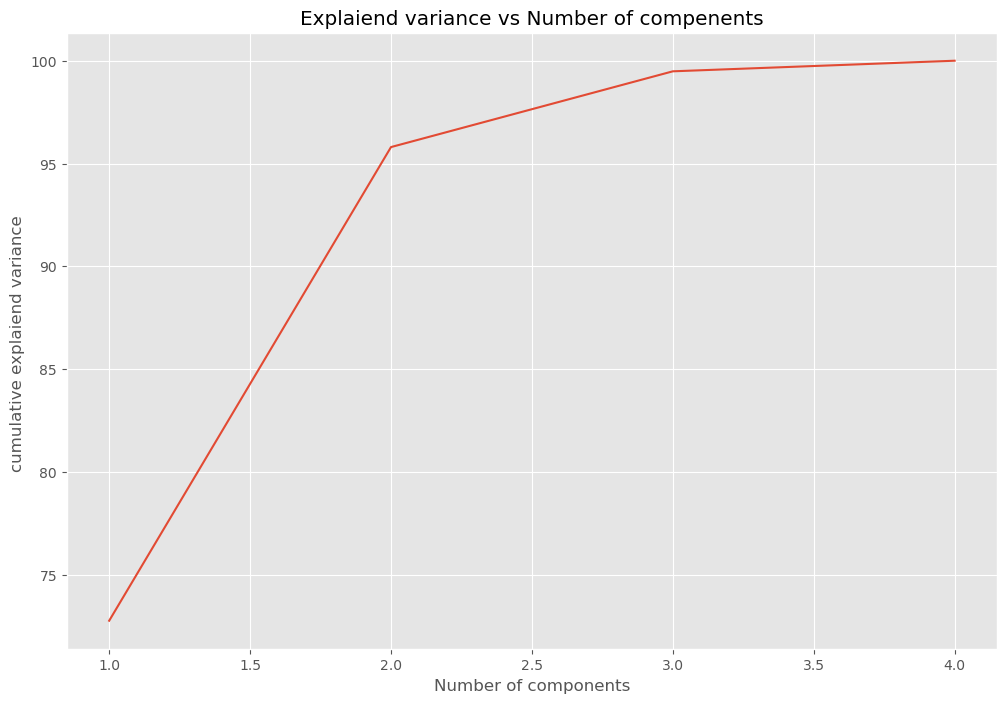

In [15]:
sns.lineplot(x= [1, 2, 3, 4], y = cumulative_variance_explaiend);
plt.xlabel("Number of components")
plt.ylabel("cumulative explaiend variance ")
plt.title("Explaiend variance vs Number of compenents")
plt.show()


In [17]:
eigen_vectors


array([[ 0.52237162, -0.37231836, -0.72101681,  0.26199559],
       [-0.26335492, -0.92555649,  0.24203288, -0.12413481],
       [ 0.58125401, -0.02109478,  0.14089226, -0.80115427],
       [ 0.56561105, -0.06541577,  0.6338014 ,  0.52354627]])

In [18]:
projection_matrix = (eigen_vectors.T[:][:])[:2].T
print("projection matrix: \n", projection_matrix)


projection matrix: 
 [[ 0.52237162 -0.37231836]
 [-0.26335492 -0.92555649]
 [ 0.58125401 -0.02109478]
 [ 0.56561105 -0.06541577]]


#### notice that we reduce matrix here

## Principle Component Analysis 

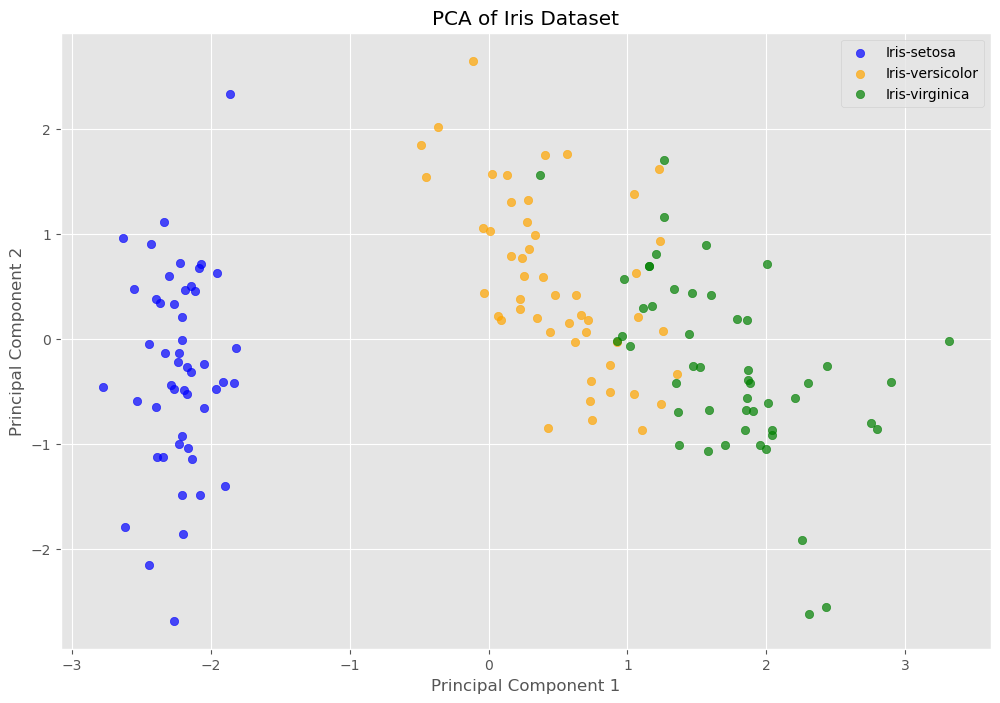

In [55]:
X_pca = X.dot(projection_matrix)

species_labels = ['Iris-setosa', 'Iris-versicolor', 'Iris-virginica']
species_colors = ['blue', 'orange', 'green']


for i, species in enumerate(species_labels):
    plt.scatter(X_pca[y == i, 0], X_pca[y == i, 1], label=species, color=species_colors[i], alpha=0.7)

plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('PCA of Iris Dataset')
plt.legend()
plt.show()



## Correlation Matrix 

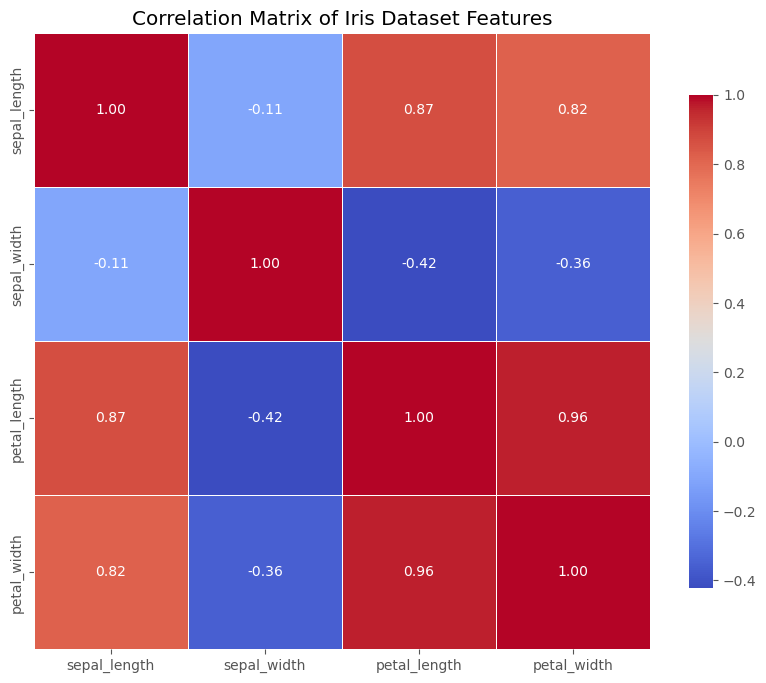

In [57]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


url = "https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data"
column_names = ["sepal_length", "sepal_width", "petal_length", "petal_width", "species"]
iris = pd.read_csv(url, header=None, names=column_names)

iris.dropna(inplace=True)

numerical_columns = ["sepal_length", "sepal_width", "petal_length", "petal_width"]

corr_matrix = iris[numerical_columns].corr()

plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', square=True, fmt='.2f',
            linewidths=0.5, cbar_kws={"shrink": 0.8})
plt.title('Correlation Matrix of Iris Dataset Features')
plt.show()


## Boxplot

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


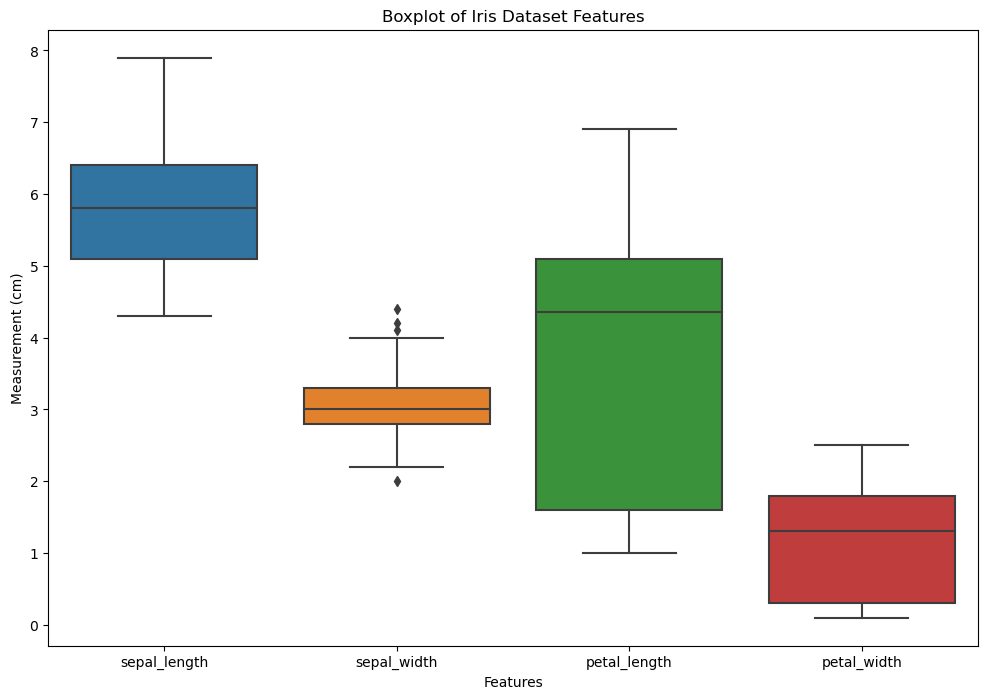

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

iris = pd.read_csv("https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data",
                   header=None)
iris.columns = ["sepal_length", "sepal_width", "petal_length", "petal_width", "species"] 


iris.dropna(how='all', inplace=True)

iris.info()

plt.figure(figsize=(12, 8))

sns.boxplot(data=iris.drop('species', axis=1))  # Exclude species column from boxplot

plt.xlabel('Features')
plt.ylabel('Measurement (cm)')
plt.title('Boxplot of Iris Dataset Features')

plt.show()


## Pair Plot

C:\Users\hosei\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


<Figure size 1200x800 with 0 Axes>

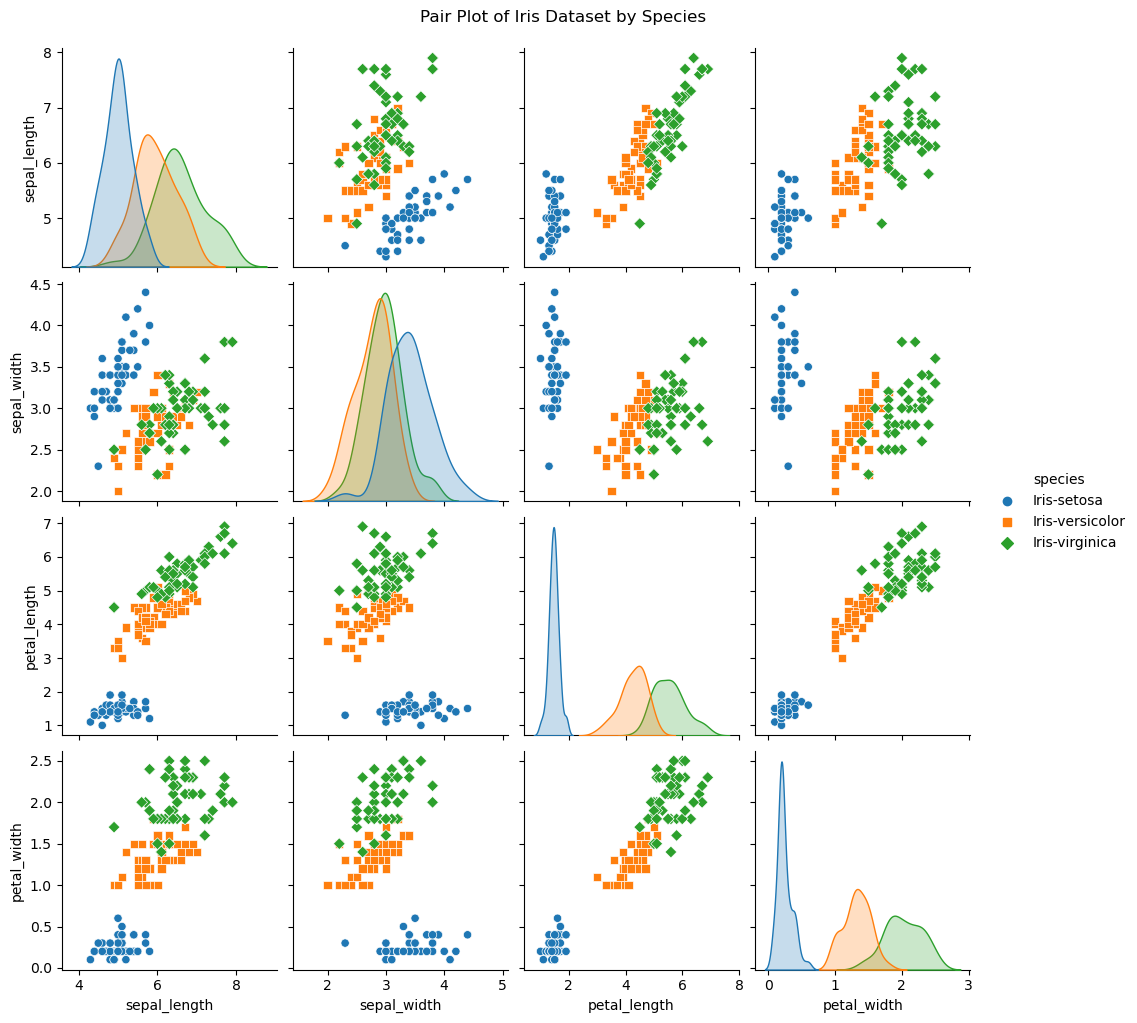

In [6]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
import numpy as np


iris = pd.read_csv("https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data",
                   header=None)
iris.columns = ["sepal_length", "sepal_width", "petal_length", "petal_width", "species"] 

iris.dropna(how='all', inplace=True)


plt.figure(figsize=(12, 8))

sns.pairplot(iris, hue="species", markers=["o", "s", "D"])


plt.suptitle("Pair Plot of Iris Dataset by Species", y=1.02)

plt.show()


## Pareto Plot

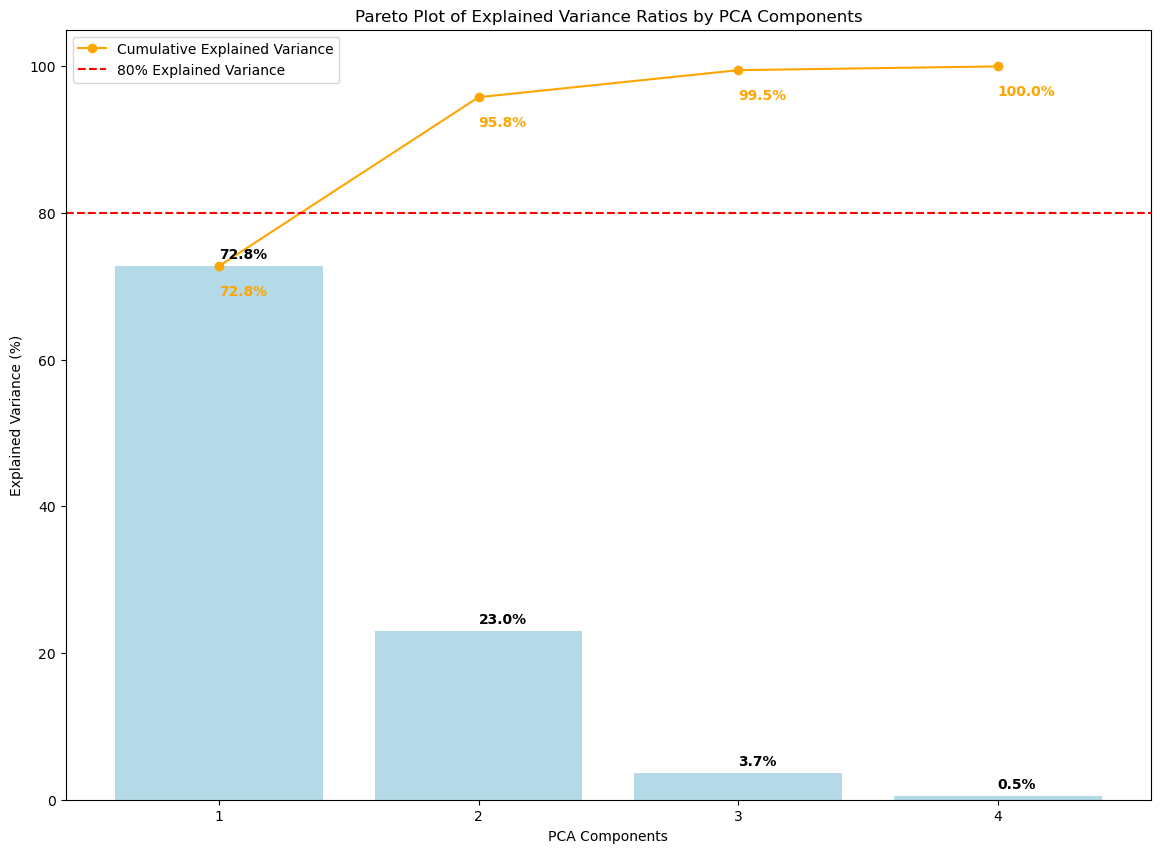

In [16]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.preprocessing import StandardScaler


iris = pd.read_csv("https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data",
                   header=None)
iris.columns = ["sepal_length", "sepal_width", "petal_length", "petal_width", "species"]
iris.dropna(how='all', inplace=True)

X = StandardScaler().fit_transform(iris.iloc[:, 0:4].values)

covariance_matrix = np.cov(X.T)

eigen_values, eigen_vectors = np.linalg.eig(covariance_matrix)


variance_explained = (eigen_values / np.sum(eigen_values)) * 100


sorted_indices = np.argsort(eigen_values)[::-1]
sorted_variance_explained = variance_explained[sorted_indices]


cumulative_variance_explained = np.cumsum(sorted_variance_explained)

plt.figure(figsize=(14, 10))


sns.barplot(x=np.arange(1, 5), y=sorted_variance_explained, color='skyblue', alpha=0.7)


plt.plot(np.arange(0, 4), cumulative_variance_explained, marker='o', color='orange', label='Cumulative Explained Variance')


for i, (var, cum_var) in enumerate(zip(sorted_variance_explained, cumulative_variance_explained)):
    plt.text(i + 0, var + 1, f'{var:.1f}%', fontsize=10, color='black', fontweight='bold')
    plt.text(i + 0, cum_var - 4, f'{cum_var:.1f}%', fontsize=10, color='orange', fontweight='bold')


plt.axhline(y=80, color='red', linestyle='--', label='80% Explained Variance')
plt.legend()


plt.title('Pareto Plot of Explained Variance Ratios by PCA Components')
plt.xlabel('PCA Components')
plt.ylabel('Explained Variance (%)')


plt.show()


## Coefficient

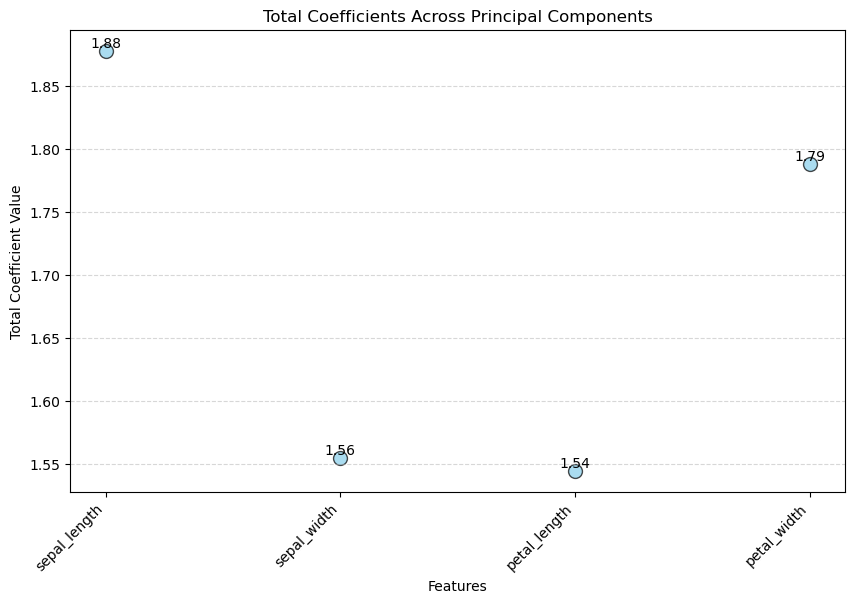

In [30]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.preprocessing import StandardScaler

iris = pd.read_csv("https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data",
                   header=None)
iris.columns = ["sepal_length", "sepal_width", "petal_length", "petal_width", "species"]
iris.dropna(how='all', inplace=True)

X = StandardScaler().fit_transform(iris.iloc[:, 0:4].values)

covariance_matrix = np.cov(X.T)

eigen_values, eigen_vectors = np.linalg.eig(covariance_matrix)

sorted_indices = np.argsort(eigen_values)[::-1]
sorted_eigen_vectors = eigen_vectors[:, sorted_indices]

total_coefficients = np.abs(sorted_eigen_vectors).sum(axis=1)

plt.figure(figsize=(10, 6))
features = iris.columns[:-1]
plt.scatter(features, total_coefficients, color='skyblue', alpha=0.7, s=100, edgecolors='black')
plt.title('Total Coefficients Across Principal Components')
plt.xlabel('Features')
plt.ylabel('Total Coefficient Value')
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', linestyle='--', alpha=0.5)
for x, y in zip(features, total_coefficients):
    plt.text(x, y + 0, f'{y:.2f}', ha='center', va='bottom', fontsize=10, color='black')
plt.show()



## Biplot

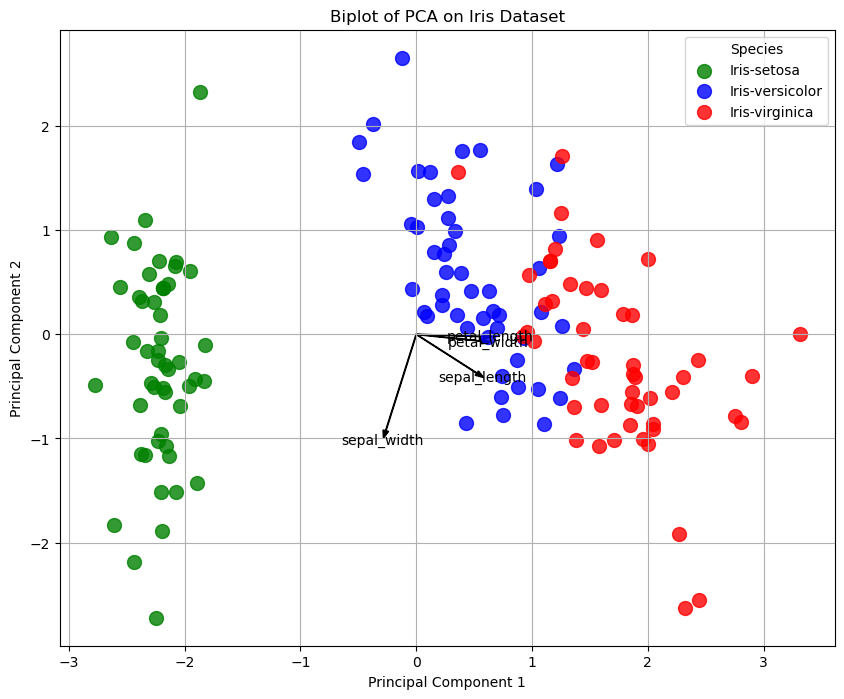

In [52]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.preprocessing import StandardScaler

iris = pd.read_csv("https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data",
                   header=None)
iris.columns = ["sepal_length", "sepal_width", "petal_length", "petal_width", "species"]
iris.dropna(how='all', inplace=True)

X = StandardScaler().fit_transform(iris.iloc[:, 0:4].values)

covariance_matrix = np.cov(X.T)

eigen_values, eigen_vectors = np.linalg.eig(covariance_matrix)

sorted_indices = np.argsort(eigen_values)[::-1]
eigen_values = eigen_values[sorted_indices]
eigen_vectors = eigen_vectors[:, sorted_indices]

projection_matrix = eigen_vectors[:, :2]
X_pca = X.dot(projection_matrix)

PC1_coefficients = projection_matrix[:, 0]
PC2_coefficients = projection_matrix[:, 1]

plt.figure(figsize=(10, 8))
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')

for i in range(len(PC1_coefficients)):
    plt.arrow(0, 0, PC1_coefficients[i], PC2_coefficients[i], color='k', width=0.005, head_width=0.05)
    plt.text(PC1_coefficients[i] * 1.1, PC2_coefficients[i] * 1.1, iris.columns[i], color='k', ha='center', va='center')

species_colors = {'Iris-setosa': 'g', 'Iris-versicolor': 'b', 'Iris-virginica': 'r'}
for species, color in species_colors.items():
    idx = iris['species'] == species
    plt.scatter(X_pca[idx, 0], X_pca[idx, 1], c=color, label=species, alpha=0.8, s=100)

plt.legend(title='Species')
plt.title('Biplot of PCA on Iris Dataset')
plt.grid(True)
plt.show()


## Classifications
#### we compare the classifier performance before PCA and after PCA

#### At first dataset is split into train and test set with 70% and 30% ratio respectively. Then using the PyCaret compare_models() function, the models which shows the highest accuracy on the original dataset can be found. Before applying PCA, the output from compare_models() function shows that Linear Discriminant Analayis, Extra Trees Classifier, and Gradient Boosting Classifier shows the best performance.

#### However, after applying PCA, the these models performance decreases and Logistic Regression, K-nearest neighbour, and Quadratic Discriminant Analysis shows the highest performance. Therefore, I have taken Logistic Regression, K-nearest Neighbour and Quadratic discriminant Analysis as my classification algorithms and applied these three models on the original dataset before applying PCA and after applying PCA.

Classification Results Without PCA:
            Classifier  Accuracy
0  Logistic Regression       1.0
1                  KNN       1.0
2                  SVM       1.0
3        Decision Tree       1.0
4        Random Forest       1.0

Classification Results With PCA (2 Components):
            Classifier  Accuracy
0  Logistic Regression  0.900000
1                  KNN  0.933333
2                  SVM  0.900000
3        Decision Tree  0.900000
4        Random Forest  0.900000


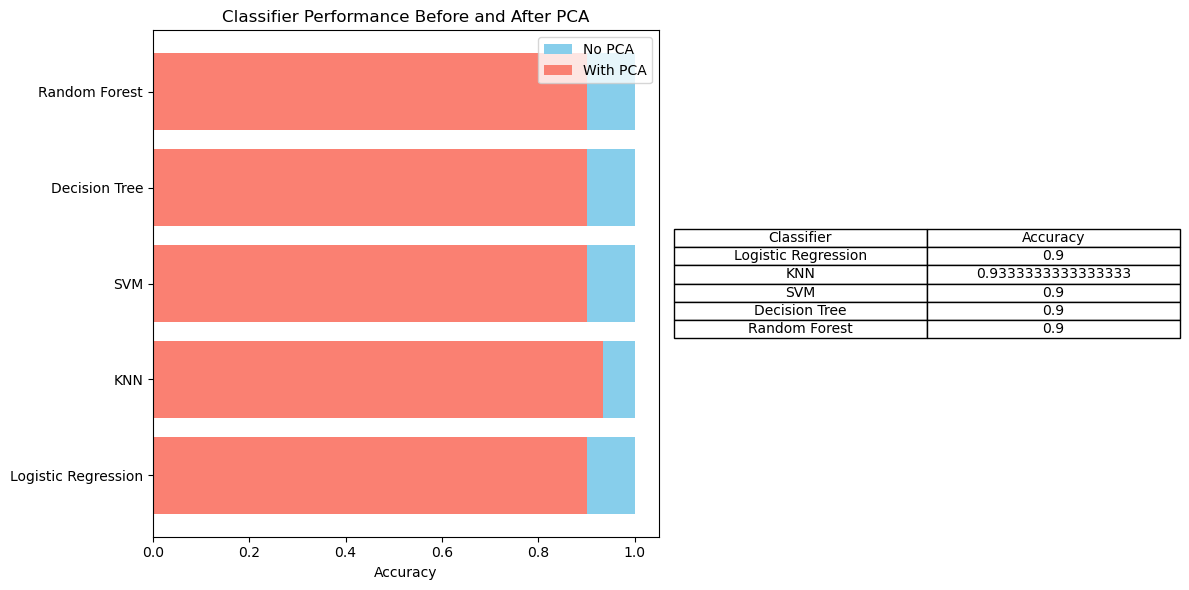


Best Model Before PCA: Logistic Regression (Accuracy: 1.0000)
Best Model After PCA: KNN (Accuracy: 0.9333)


In [61]:
import pandas as pd
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
import matplotlib.pyplot as plt

def evaluate_classifier(clf, X_train, X_test, y_train, y_test):
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    return accuracy

def compare_models(X_train, X_test, y_train, y_test):
    classifiers = {
        "Logistic Regression": LogisticRegression(),
        "KNN": KNeighborsClassifier(),
        "SVM": SVC(),
        "Decision Tree": DecisionTreeClassifier(),
        "Random Forest": RandomForestClassifier()
    }

    results = {}
    for name, clf in classifiers.items():
        accuracy = evaluate_classifier(clf, X_train, X_test, y_train, y_test)
        results[name] = accuracy

    best_model = max(results, key=results.get)
    return best_model, results

iris = load_iris()
X, y = iris.data, iris.target

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

scaler = StandardScaler()
X_train_std = scaler.fit_transform(X_train)
X_test_std = scaler.transform(X_test)


pca = PCA(n_components=2)
X_train_pca = pca.fit_transform(X_train_std)
X_test_pca = pca.transform(X_test_std)

best_model_no_pca, results_no_pca = compare_models(X_train_std, X_test_std, y_train, y_test)
best_model_with_pca, results_with_pca = compare_models(X_train_pca, X_test_pca, y_train, y_test)

print("Classification Results Without PCA:")
results_no_pca_df = pd.DataFrame(results_no_pca.items(), columns=['Classifier', 'Accuracy'])
print(results_no_pca_df)

print("\nClassification Results With PCA (2 Components):")
results_with_pca_df = pd.DataFrame(results_with_pca.items(), columns=['Classifier', 'Accuracy'])
print(results_with_pca_df)

plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.barh(results_no_pca_df['Classifier'], results_no_pca_df['Accuracy'], color='skyblue', label='No PCA')
plt.barh(results_with_pca_df['Classifier'], results_with_pca_df['Accuracy'], color='salmon', label='With PCA')
plt.xlabel('Accuracy')
plt.title('Classifier Performance Before and After PCA')
plt.legend()

plt.subplot(1, 2, 2)
plt.axis('off')  # Hide axes
plt.table(cellText=results_with_pca_df.values,
          colLabels=results_with_pca_df.columns,
          cellLoc='center',
          loc='center')

plt.tight_layout()
plt.show()

print(f"\nBest Model Before PCA: {best_model_no_pca} (Accuracy: {results_no_pca[best_model_no_pca]:.4f})")
print(f"Best Model After PCA: {best_model_with_pca} (Accuracy: {results_with_pca[best_model_with_pca]:.4f})")


#### we find best Hyperparameters

In [63]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report

data = load_iris()
X = data.data
y = data.target
target_names = data.target_names

X = StandardScaler().fit_transform(X)

covariance_matrix = np.cov(X.T)
eigen_values, eigen_vectors = np.linalg.eig(covariance_matrix)
projection_matrix = eigen_vectors[:, :2]
X_pca = X.dot(projection_matrix)

X_train, X_test, y_train, y_test = train_test_split(X_pca, y, test_size=0.2, random_state=42)

model = LogisticRegression()

param_grid = {
    'penalty': ['l2'],  # Use only 'l2' penalty with lbfgs solver
    'C': [0.001, 0.01, 0.1, 1, 10, 100]
}

grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=5, scoring='accuracy')

grid_search.fit(X_train, y_train)

best_model = grid_search.best_estimator_
best_params = grid_search.best_params_

y_pred = best_model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)

class_report = classification_report(y_test, y_pred, target_names=target_names)

print("Best Hyperparameters:", best_params)
print("Test Accuracy:", accuracy)
print("Classification Report:\n", class_report)


Best Hyperparameters: {'C': 1, 'penalty': 'l2'}
Test Accuracy: 0.9
Classification Report:
               precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        10
  versicolor       0.88      0.78      0.82         9
   virginica       0.83      0.91      0.87        11

    accuracy                           0.90        30
   macro avg       0.90      0.90      0.90        30
weighted avg       0.90      0.90      0.90        30



## Decision boundaries

#### Logistic Regression

Test Accuracy: 0.9
Classification Report:
               precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        10
  versicolor       0.88      0.78      0.82         9
   virginica       0.83      0.91      0.87        11

    accuracy                           0.90        30
   macro avg       0.90      0.90      0.90        30
weighted avg       0.90      0.90      0.90        30



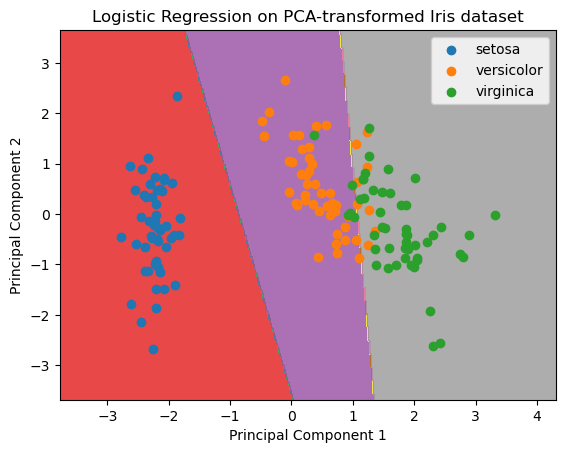

In [64]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report

data = load_iris()
X = data.data
y = data.target
target_names = data.target_names

X = StandardScaler().fit_transform(X)

covariance_matrix = np.cov(X.T)
eigen_values, eigen_vectors = np.linalg.eig(covariance_matrix)
projection_matrix = eigen_vectors[:, :2]
X_pca = X.dot(projection_matrix)

X_train, X_test, y_train, y_test = train_test_split(X_pca, y, test_size=0.2, random_state=42)

logreg = LogisticRegression()
logreg.fit(X_train, y_train)

y_pred = logreg.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
class_report = classification_report(y_test, y_pred, target_names=target_names)

print("Test Accuracy:", accuracy)
print("Classification Report:\n", class_report)

h = 0.02  # Step size in the mesh
x_min, x_max = X_pca[:, 0].min() - 1, X_pca[:, 0].max() + 1
y_min, y_max = X_pca[:, 1].min() - 1, X_pca[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
Z = logreg.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

plt.contourf(xx, yy, Z, cmap=plt.cm.Set1, alpha=0.8)
for species in range(len(target_names)):
    plt.scatter(X_pca[y == species, 0], X_pca[y == species, 1], label=target_names[species])

plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('Logistic Regression on PCA-transformed Iris dataset')
plt.legend()
plt.show()


#### K-nearest neighbour

Test Accuracy: 0.9333333333333333
Classification Report:
               precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        10
  versicolor       1.00      0.78      0.88         9
   virginica       0.85      1.00      0.92        11

    accuracy                           0.93        30
   macro avg       0.95      0.93      0.93        30
weighted avg       0.94      0.93      0.93        30



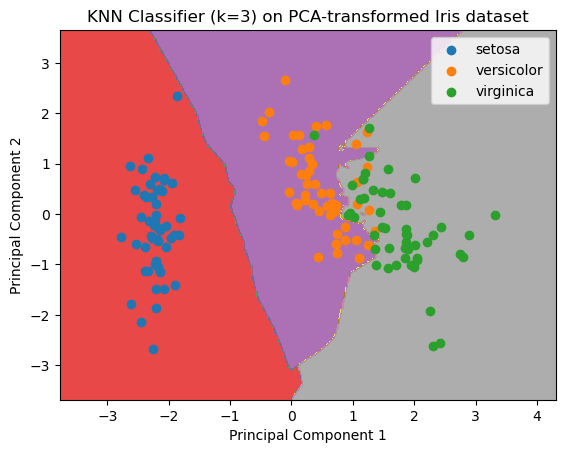

In [66]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report

data = load_iris()
X = data.data
y = data.target
target_names = data.target_names

X = StandardScaler().fit_transform(X)

covariance_matrix = np.cov(X.T)
eigen_values, eigen_vectors = np.linalg.eig(covariance_matrix)
projection_matrix = eigen_vectors[:, :2]
X_pca = X.dot(projection_matrix)

X_train, X_test, y_train, y_test = train_test_split(X_pca, y, test_size=0.2, random_state=42)

k = 3  # Number of neighbors
knn = KNeighborsClassifier(n_neighbors=k)
knn.fit(X_train, y_train)

y_pred = knn.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
class_report = classification_report(y_test, y_pred, target_names=target_names)

print("Test Accuracy:", accuracy)
print("Classification Report:\n", class_report)

h = 0.02  # Step size in the mesh
x_min, x_max = X_pca[:, 0].min() - 1, X_pca[:, 0].max() + 1
y_min, y_max = X_pca[:, 1].min() - 1, X_pca[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
Z = knn.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

plt.contourf(xx, yy, Z, cmap=plt.cm.Set1, alpha=0.8)
for species in range(len(target_names)):
    plt.scatter(X_pca[y == species, 0], X_pca[y == species, 1], label=target_names[species])

plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('KNN Classifier (k=3) on PCA-transformed Iris dataset')
plt.legend()
plt.show()


#### Quadratic Discriminant Analysis

Test Accuracy: 0.9
Classification Report:
               precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        10
  versicolor       0.88      0.78      0.82         9
   virginica       0.83      0.91      0.87        11

    accuracy                           0.90        30
   macro avg       0.90      0.90      0.90        30
weighted avg       0.90      0.90      0.90        30



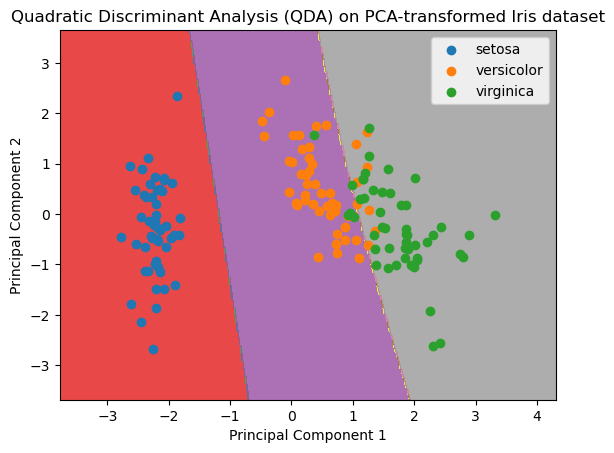

In [67]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn.metrics import accuracy_score, classification_report

data = load_iris()
X = data.data
y = data.target
target_names = data.target_names

X = StandardScaler().fit_transform(X)

covariance_matrix = np.cov(X.T)
eigen_values, eigen_vectors = np.linalg.eig(covariance_matrix)
projection_matrix = eigen_vectors[:, :2]
X_pca = X.dot(projection_matrix)

X_train, X_test, y_train, y_test = train_test_split(X_pca, y, test_size=0.2, random_state=42)

qda = QuadraticDiscriminantAnalysis()
qda.fit(X_train, y_train)

y_pred = qda.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
class_report = classification_report(y_test, y_pred, target_names=target_names)

print("Test Accuracy:", accuracy)
print("Classification Report:\n", class_report)

h = 0.02  # Step size in the mesh
x_min, x_max = X_pca[:, 0].min() - 1, X_pca[:, 0].max() + 1
y_min, y_max = X_pca[:, 1].min() - 1, X_pca[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
Z = qda.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

plt.contourf(xx, yy, Z, cmap=plt.cm.Set1, alpha=0.8)
for species in range(len(target_names)):
    plt.scatter(X_pca[y == species, 0], X_pca[y == species, 1], label=target_names[species])

plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('Quadratic Discriminant Analysis (QDA) on PCA-transformed Iris dataset')
plt.legend()
plt.show()


## Confusion matrices

#### Logistic Regression

Test Accuracy: 0.9


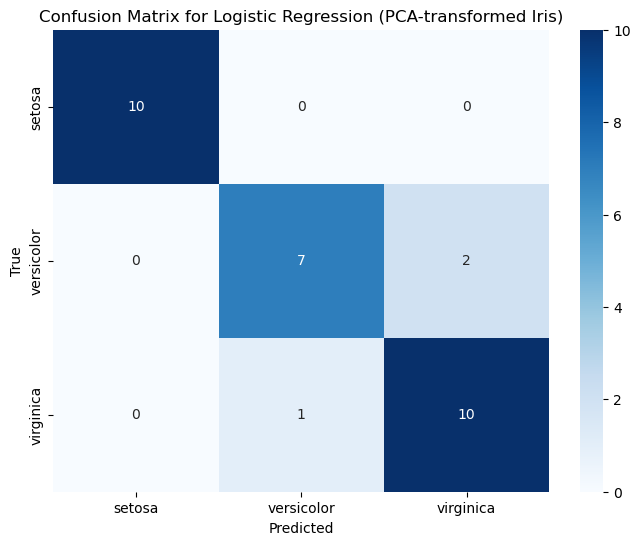

In [68]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

data = load_iris()
X = data.data
y = data.target
target_names = data.target_names

X = StandardScaler().fit_transform(X)

covariance_matrix = np.cov(X.T)
eigen_values, eigen_vectors = np.linalg.eig(covariance_matrix)
projection_matrix = eigen_vectors[:, :2]
X_pca = X.dot(projection_matrix)

X_train, X_test, y_train, y_test = train_test_split(X_pca, y, test_size=0.2, random_state=42)

logreg = LogisticRegression()
logreg.fit(X_train, y_train)

y_pred = logreg.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print("Test Accuracy:", accuracy)

conf_matrix = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=target_names, yticklabels=target_names)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix for Logistic Regression (PCA-transformed Iris)')
plt.show()


#### K-nearest Neighbour

Test Accuracy: 0.9333333333333333


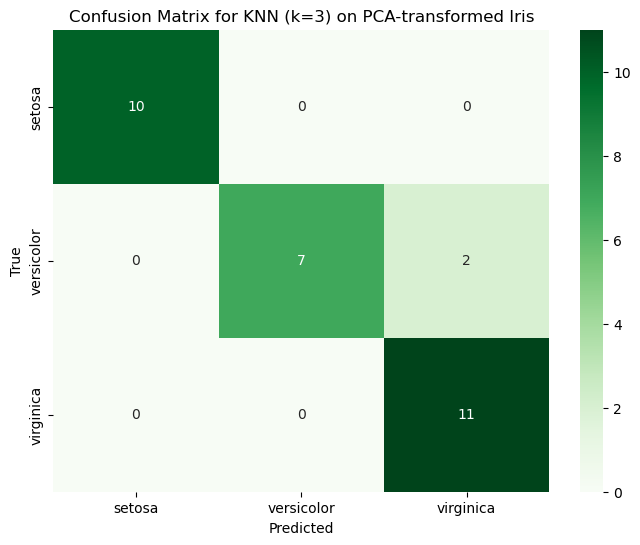

In [69]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

data = load_iris()
X = data.data
y = data.target
target_names = data.target_names

X = StandardScaler().fit_transform(X)

covariance_matrix = np.cov(X.T)
eigen_values, eigen_vectors = np.linalg.eig(covariance_matrix)
projection_matrix = eigen_vectors[:, :2]
X_pca = X.dot(projection_matrix)

X_train, X_test, y_train, y_test = train_test_split(X_pca, y, test_size=0.2, random_state=42)

k = 3  # Number of neighbors
knn = KNeighborsClassifier(n_neighbors=k)
knn.fit(X_train, y_train)

y_pred = knn.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print("Test Accuracy:", accuracy)

conf_matrix = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Greens', xticklabels=target_names, yticklabels=target_names)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title(f'Confusion Matrix for KNN (k={k}) on PCA-transformed Iris')
plt.show()


#### Quadratic Discriminant Analysis

Test Accuracy: 0.9


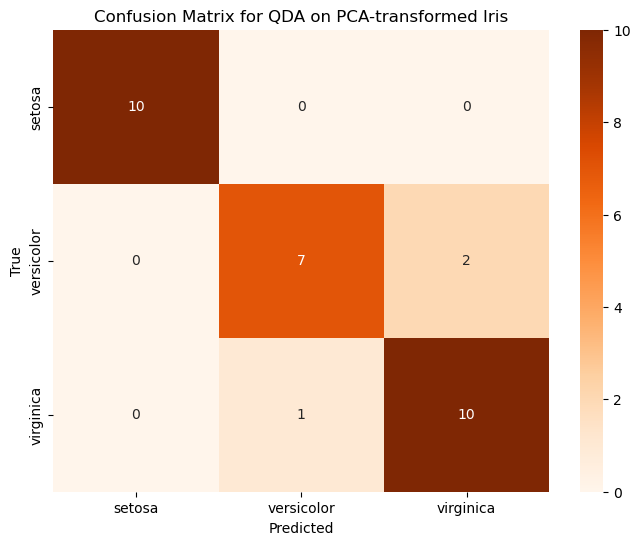

In [70]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn.metrics import accuracy_score, confusion_matrix

data = load_iris()
X = data.data
y = data.target
target_names = data.target_names

X = StandardScaler().fit_transform(X)

covariance_matrix = np.cov(X.T)
eigen_values, eigen_vectors = np.linalg.eig(covariance_matrix)
projection_matrix = eigen_vectors[:, :2]
X_pca = X.dot(projection_matrix)

X_train, X_test, y_train, y_test = train_test_split(X_pca, y, test_size=0.2, random_state=42)

qda = QuadraticDiscriminantAnalysis()
qda.fit(X_train, y_train)

y_pred = qda.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print("Test Accuracy:", accuracy)

conf_matrix = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Oranges', xticklabels=target_names, yticklabels=target_names)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix for QDA on PCA-transformed Iris')
plt.show()


## ROC curve

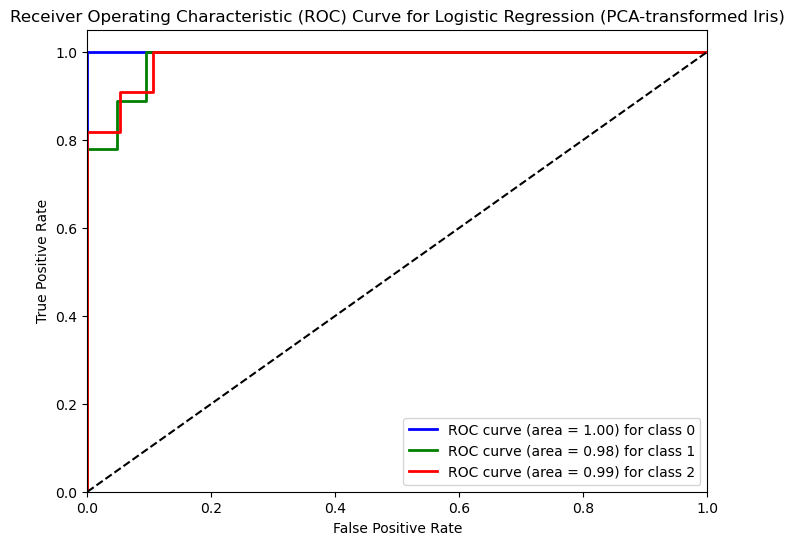

In [71]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_curve, roc_auc_score
from sklearn.preprocessing import label_binarize
from sklearn.multiclass import OneVsRestClassifier

data = load_iris()
X = data.data
y = data.target

X = StandardScaler().fit_transform(X)

covariance_matrix = np.cov(X.T)
eigen_values, eigen_vectors = np.linalg.eig(covariance_matrix)
projection_matrix = eigen_vectors[:, :2]
X_pca = X.dot(projection_matrix)

X_train, X_test, y_train, y_test = train_test_split(X_pca, y, test_size=0.2, random_state=42)

logreg = LogisticRegression()
logreg.fit(X_train, y_train)

y_score = logreg.predict_proba(X_test)

y_test_bin = label_binarize(y_test, classes=[0, 1, 2])
n_classes = y_test_bin.shape[1]

fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test_bin[:, i], y_score[:, i])
    roc_auc[i] = roc_auc_score(y_test_bin[:, i], y_score[:, i])

plt.figure(figsize=(8, 6))
colors = ['blue', 'green', 'red']
for i, color in zip(range(n_classes), colors):
    plt.plot(fpr[i], tpr[i], color=color, lw=2, label=f'ROC curve (area = {roc_auc[i]:.2f}) for class {i}')

plt.plot([0, 1], [0, 1], color='black', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve for Logistic Regression (PCA-transformed Iris)')
plt.legend(loc='lower right')
plt.show()
